# 线性回归
* 线性回归方程实现：可求解情况极少，机器学习中核心的思想是迭代更新
![](./images/linearreg.png)
* 梯度下降效果
* 对比不同梯度下降策略
*


In [79]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)


## 最小二乘法直接求解

In [80]:
X = 2*np.random.rand(100, 1)
y = 4+3*X+np.random.rand(100, 1) # 最后部分为随机抖动

(0.0, 2.0, 0.0, 15.0)

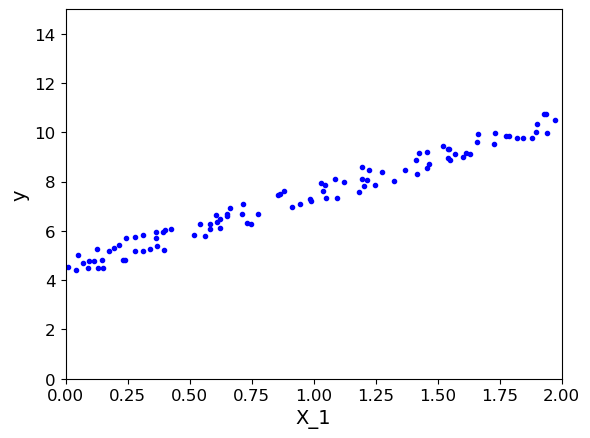

In [82]:
plt.plot(X, y, 'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])

In [83]:
# 加上偏置项系数1
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 求逆

In [84]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [85]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.51359766],
       [10.48006601]])

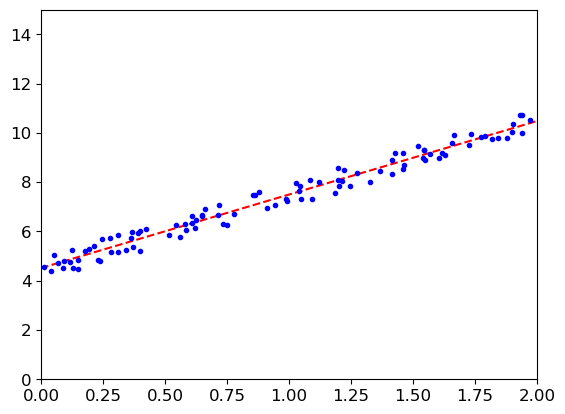

In [86]:
plt.plot(X_new, y_pred, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

## 批量梯度下降(全量)
核心解决方案，不仅在线性回归中能用到，在其它回归、神经网络中也能用上。
[sklearn](https://scikit-learn.org/stable/auto_examples/index.html)

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# 权重参数、偏置参数
print(lin_reg.coef_)
print(lin_reg.intercept_) 

[[2.98323418]]
[4.51359766]


### 问题
学习率应该尽可能小，且在学习过程中，应该调小。

* 步长太小：训练时间长
* 步长太大：
* 数据下降不平滑：数据标准化（sklearn.preprocessing）


![test](./images/test.png)

In [88]:
# 学习率
eta = 0.1
n_iterations =1000
m = 100 # 样本个数 X.shape[0]
theta = np.random.randn(2, 1) # 初始化权重参数，必须随机
# 迭代
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [89]:
theta
X_new_b.dot(theta)

array([[ 4.51359766],
       [10.48006601]])

In [90]:
# 
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, 'b.') # 散点图
    n_iterations = 1000
    for _ in range(n_iterations):
        y_pred = X_new_b.dot(theta)
        plt.plot(X_new, y_pred, 'b-')
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("X_1")
    plt.axis([0, 2, 0, 15]) # 取值范围
    plt.title("eta = {}".format(eta))

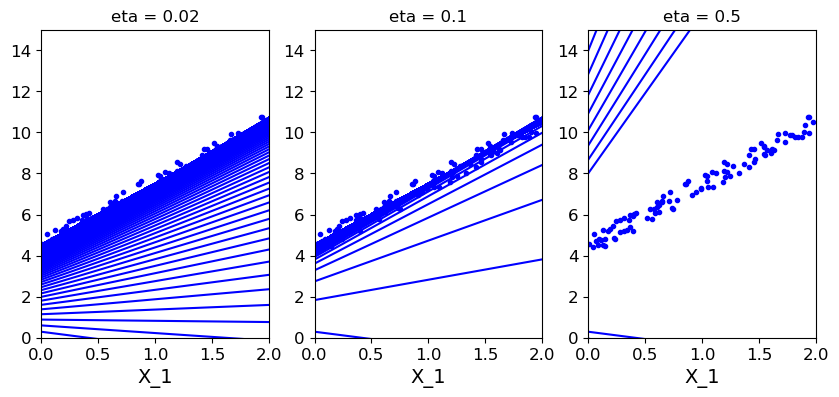

In [91]:
theta = np.random.randn(2, 1)
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)  # 
plot_gradient_descent(theta, 0.02)
plt.subplot(1, 3, 2)  # 
plot_gradient_descent(theta, 0.1, theta_path_bgd)
plt.subplot(1, 3, 3) # 
plot_gradient_descent(theta, 0.5)
plt.show()

# 随机梯度下降


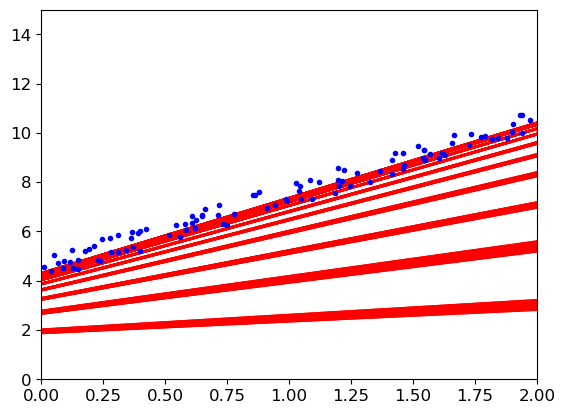

In [92]:
theta_path_sgd = []
m = len(X_b)
n_epochs = 50
# 学习率由大到小
t0 = 5
t1 = 50

def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2, 1)

# 一个 epoch 遍历一次数据集
for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i < 20:
            y_pred = X_new_b.dot(theta)
            plt.plot(X_new, y_pred, 'r-')
        random_index = np.random.randint(m) # 随机选一个
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(n_epochs*m+i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
        

# miniBatch, 小批量梯度下降
实际当中用 miniBatch 较多，一般情况下选择 batch 越大越好。

In [93]:
theta_path_mgd=[]
n_epochs = 50 # 随机梯度下降迭代多，是由于每次只选一个样本
minibatch = 16
# np.random.seed(42)
theta = np.random.randn(2, 1)

t = 0 # control the learning rate
for epoch in range(n_epochs):
    # 避免每一次都处理同一批数据，增加洗牌操作
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch):
        t+=1
        xi = X_b_shuffled[i:i+minibatch]
        yi = y_shuffled[i:i+minibatch]
        gradients = 2/minibatch * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mgd.append(theta)



In [ ]:
theta

array([[7.47534952],
       [0.24726171]])

对比

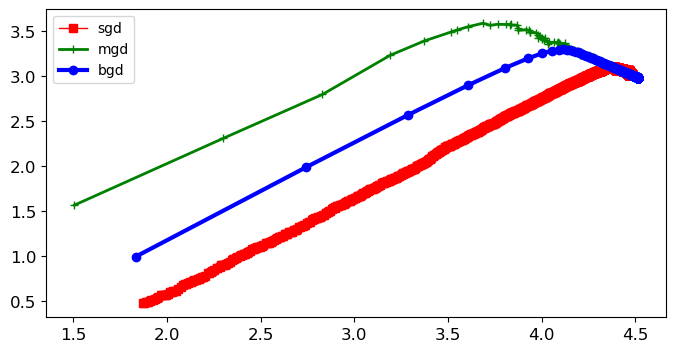

In [94]:
theta_path_bgd_a = np.array(theta_path_bgd)
theta_path_sgd_a = np.array(theta_path_sgd)
theta_path_mgd_a = np.array(theta_path_mgd)
plt.figure(figsize=(8, 4))
plt.plot(theta_path_sgd_a[:,0], theta_path_sgd_a[:,1], 'r-s', linewidth=1, label='sgd')
plt.plot(theta_path_mgd_a[:,0], theta_path_mgd_a[:,1], 'g-+', linewidth=2, label='mgd')
plt.plot(theta_path_bgd_a[:,0], theta_path_bgd_a[:,1], 'b-o', linewidth=3, label='bgd')
plt.legend(loc="upper left")
plt.show()


# 多项式回归
特征变换越复杂，得到的结果过拟合风险越高。

In [107]:
m = 100
X = 6*np.random.rand(m, 1)-3 # [-3, 3]
y = 0.5*X**2+X+np.random.randn(m, 1) # randn 是高斯随机


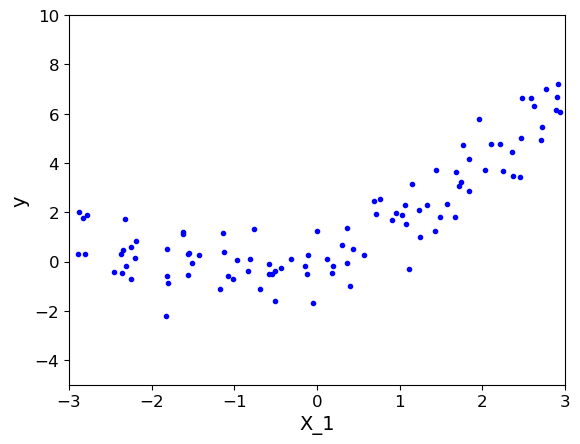

In [108]:
plt.plot(X, y, 'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,-5, 10])
plt.show()

In [111]:
# 数据变换
from sklearn.preprocessing import PolynomialFeatures
# include_bias: 是否包含偏置项处理，degree 表示幂
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [112]:
X[0]

array([0.19725861])

In [113]:
X_poly[0]

array([0.19725861, 0.03891096])

In [114]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.coef_)
print(lin_reg.intercept_) 

[[0.93690065 0.44248468]]
[0.17260447]


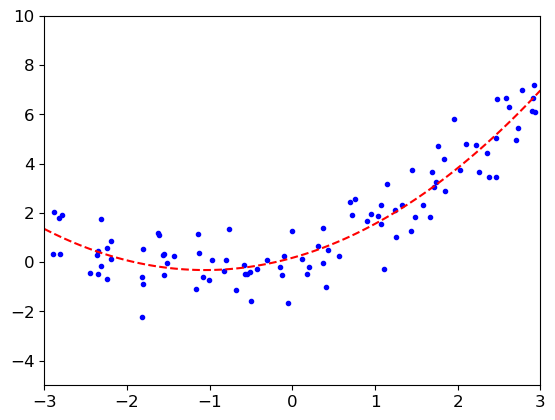

In [115]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r--', label='prediction')
plt.axis([-3, 3, -5, 10])
plt.show()

处理步骤：
* 多项式处理
* 标准化
* 建模：fit

### 不同多项式幂对模型的影响

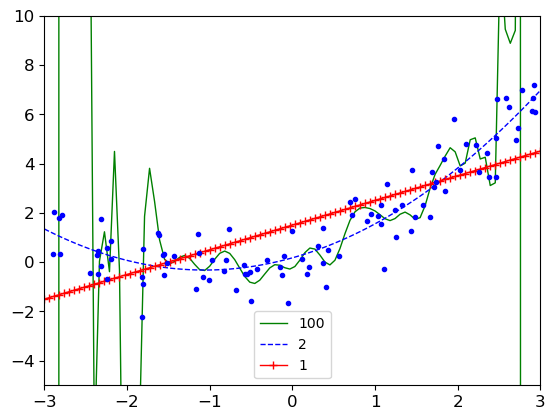

In [119]:
## 对比实验
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure
for style, width, degree in (('g-', 1, 100), ('b--', 1, 2), ('r-+', 1, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([("poly_features", poly_features),
    ("StandardScaler", std), 
    ("lin_reg", lin_reg)])
    polynomial_reg.fit(X, y)
    y_new_2 = polynomial_reg.predict(X_new)
    plt.plot(X_new, y_new_2, style, label=str(degree), linewidth=width) 

plt.plot(X, y, 'b.')
plt.axis([-3, 3, -5, 10])
plt.legend()
plt.show()

## 样本数量对结果的影响
sklearn.metrics
数据量越少，训练集效果越好，但实际测试效果不好。

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # mse: 均方误差
        # training mse 和验证集 mse 应该是验证集的 MSE 越小越好，代表其预测质量好
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))# y_val[:m]
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train_error')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val_error')
    plt.xlabel('train set size')
    plt.ylabel('MSE')
    plt.legend()


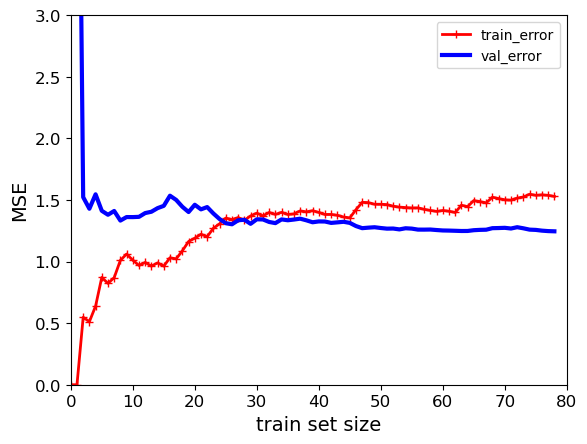

In [125]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

## 正则化：防止过拟合
对权重参数进行惩罚，让权重参数尽可能平滑。有两种不同方法进行正则化惩罚：岭回归（ridge）与 lasso
- 岭回归损失函数
![](./images/ridge_target.png)
- lasso 损失函数
![](./images/lasso_target.png)

alpha（惩罚）越大，越平滑。

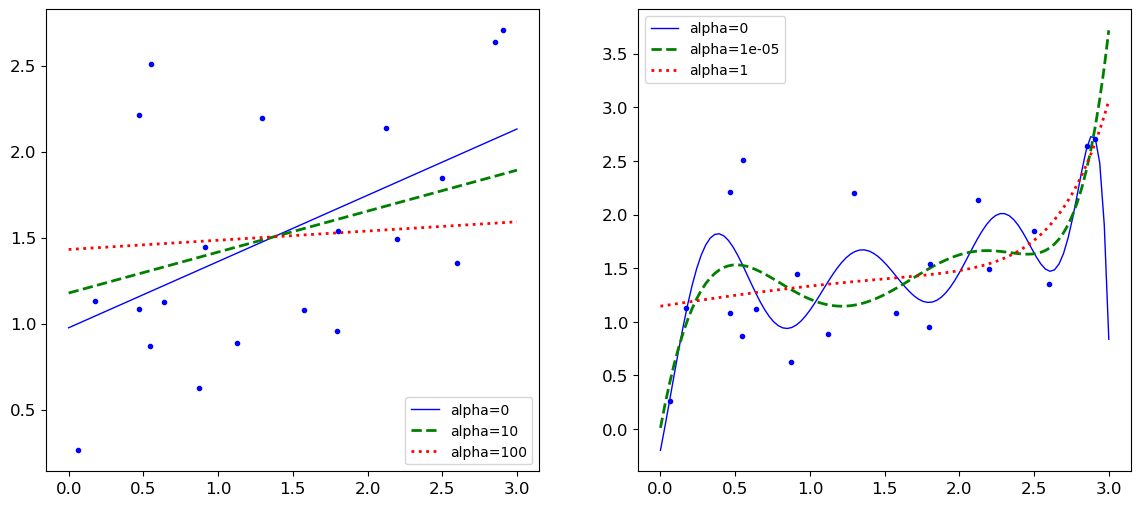

In [129]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3*np.random.rand(m, 1)
y = 0.5*X+np.random.randn(m, 1)/1.5 + 1
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_clase, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_clase(alpha, **model_kargs)
        if polynomial:
            model = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("StandardScaler", std), 
                ("lin_reg", model)])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label='alpha={}'.format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend()

plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))
plt.show()


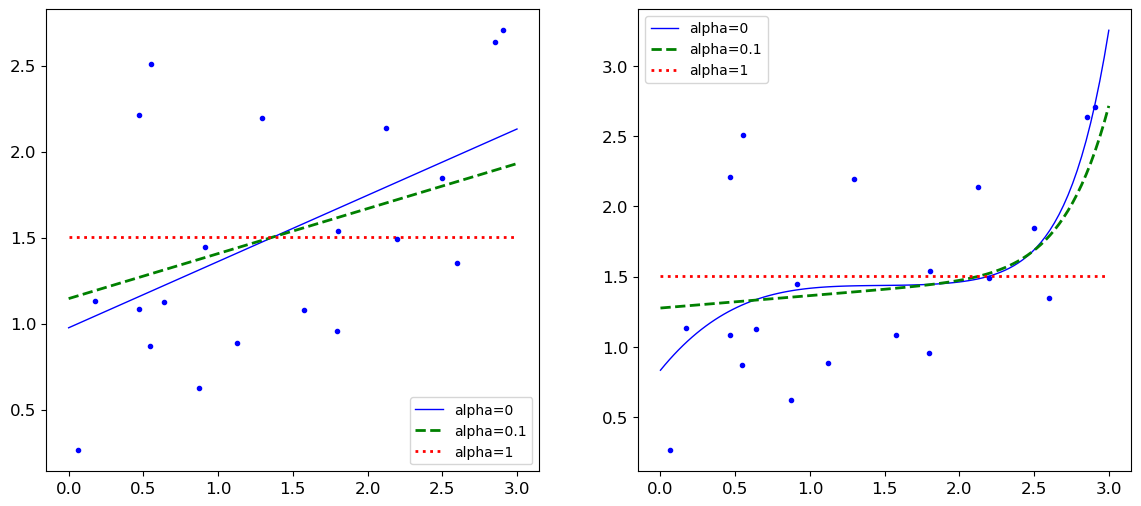

In [130]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-1, 1))
plt.show()